### Example

* Suppose we have two samples that represent biki ride durations for two distinct neighborhoods `a` and `b`

1. Instead of working with actual data, sample the data from a gaussian the same mean ($\mu=20$) the same same standard deviation ($\sigma = 4$)
    * We will sample 15 bike rides for each of regions `a` and `b`
    

> Note: for some of the code below, referenced Lecture Slides 17 & 18

In [160]:
import numpy as np

np.random.seed(0)
data_a = np.random.normal(
    loc   = 20,
    scale = 4,
    size  = 15
)
data_b = np.random.normal(20,4,15)

### Example - cont'd

2. Compute and compare the means of datasets `a` `b`
  * Based on the observed difference between the means, do you believe there is a statistically significant difference between samples `a` and `b`

In [161]:
mean_a, mean_b = np.mean(data_a), np.mean(data_b)
f'mean_a: {mean_a:.4f}; mean_b: {mean_b:.4f}'

'mean_a: 22.7480; mean_b: 20.7948'

In [162]:
f'The difference between the means is {mean_a-mean_b:.4f}'

'The difference between the means is 1.9532'

> Since the difference in means is roughly 8% for 20 samples, there appears to be a statistically significant difference.

### Example - cont'd

3. draw the two KDEs reprenting the datasets `a` and `b`
  * You should have a figure that appears "approximately" as in the figure below
    * The X- and Y-axis values have been intentionally omitted
    
![](https://www.dropbox.com/s/0ab4d92lkcn89jv/a_b_kde_exmaple.png?dl=1)    

In [163]:
import scipy as sp
from scipy  import stats
import matplotlib.pyplot as plt

def label_plt(plt, title, xlab, ylab):
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.rcParams['font.size'] = 16
    return plt

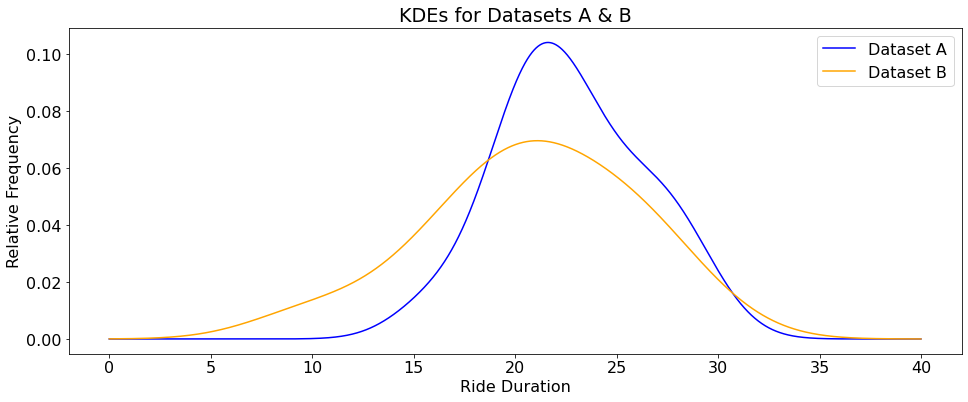

In [164]:
x_vals = np.arange(0,40,0.01)
kde_a, kde_b = [sp.stats.gaussian_kde(x) for x in [data_a, data_b]]
dens_a, dens_b = [kde.evaluate(x_vals) for kde in [kde_a, kde_b]]

plt.figure(figsize=(16,6))
plt = label_plt(plt, 'KDEs for Datasets A & B', 'Ride Duration', 'Relative Frequency')
plt.plot(x_vals, dens_a, c='blue',   label='Dataset A')
plt.plot(x_vals, dens_b, c='orange', label='Dataset B')
plt.legend(loc='upper right')

### Example - cont'd

4. Visually, does dataset *a* differ significantly from dataset `b`

> Yes, as their peaks (means) are visually significantly different.

> However, their shapes (hinting at variances) are, visually, less significantly different.

### Example - cont'd

5. Use the resampling method covered in class to test whether or not there is a statistically significant difference between datasets `a` and `b`
 * Provide a p-value to support your claim.


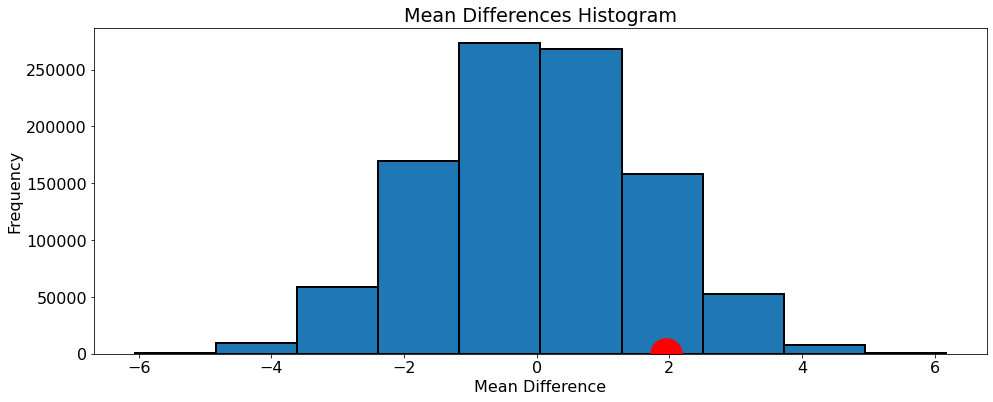

In [165]:
data = np.concatenate([data_a, data_b])

num_iters  = int(1e6)
mean_diffs = [None] * num_iters

for i in range(num_iters):
    np.random.shuffle(data)
    a = data[:15]
    b = data[15:]
    mean_diffs[i] = np.mean(a) - np.mean(b)

plt.figure(figsize=(16,6))
_ = plt.hist(mean_diffs, edgecolor='k', linewidth=2)
plt.scatter(np.mean(data_a) - np.mean(data_b), 0, c='red', s=1000)
plt = label_plt(plt, 'Mean Differences Histogram', 'Mean Difference', 'Frequency')

### Example - cont'd

6. Plot a histogram of the means obtained during resampling and the observed value. 
  * You should have a figure that appears "approximately" as in the figure below
![](https://www.dropbox.com/s/g54bal23o1ktj2j/a_b_hist_example.png?dl=1)  

In [166]:
times_greater_than_expected = sum(mean_diffs >= (np.mean(data_a)-np.mean(data_b)))
f'Times greater than expected:      {times_greater_than_expected}'

'Times greater than expected:      115986'

In [167]:
proportion_greater_than_expected = times_greater_than_expected / len(mean_diffs)
f'Proportion greater than expected: {proportion_greater_than_expected:.4f}'

'Proportion greater than expected: 0.1160'

> Thus, our associated p-value for one million iterations is 0.1160.

> This is greater than a standard critical p-value of 0.05; thus, there is not statistically significant evidence that the mean of sample A differs from that of sample B.